У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку pandas та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_file = 'bestsellers with categories.csv'

In [2]:
# read csv file
books_data = pd.read_csv(data_file)

In [3]:
# show first 5 rows
books_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# show size of the dataset
books_data.shape

(550, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 550 книг

In [5]:
# normalize columns labels
books_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
# check the number of missing values
books_data.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Відповідь: Ні

In [7]:
# check unique values of genre columns
books_data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: fiction and non-fiction

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

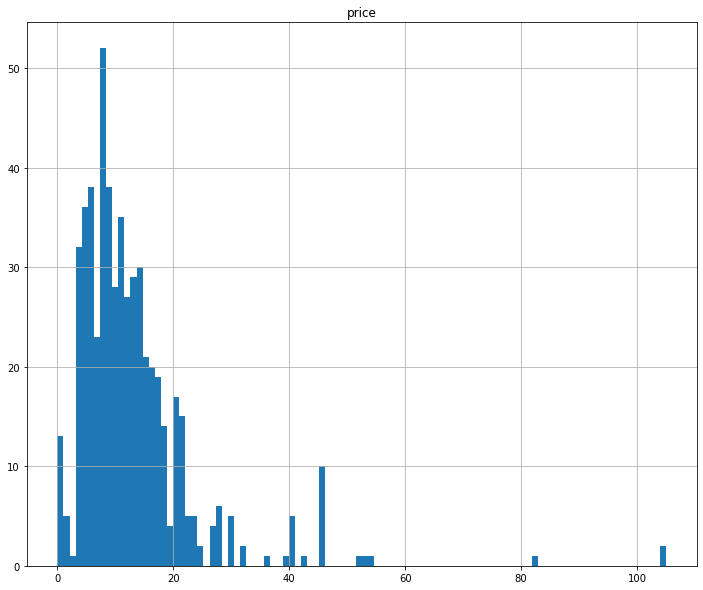

In [8]:
# look at the distribution of prices
books_data.hist(column=['price'], bins=100, figsize=(12,10))

In [9]:
# determine min, max, avg, median price 
min_price = books_data['price'].min()
max_price = books_data['price'].max()
avg_price = books_data['price'].mean()
median_price = books_data['price'].median()

Максимальна ціна? Відповідь: 105

Мінімальна ціна? Відповідь: 0

Середня ціна? Відповідь: 13.1

Медіанна ціна? Відповідь: 11

In [10]:
# highest rating in the dataset
highest_rating = books_data['user_rating'].max()
books_data.query(f'user_rating == {highest_rating}').count()

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64

Який рейтинг у датасеті найвищий? Відповідь: 4.9

Скільки книг мають такий рейтинг? Відповідь: 52

In [11]:
# a book with the highest number of reviews
max_reviews = books_data['reviews'].max()
books_data.query(f'reviews == {max_reviews}')

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків?
Відповідь: Where the Crawdads Sing	by Delia Owens

In [12]:
# find the most expensive book among the books that became bestsellers in 2015
grouped_by_year = books_data.query('year == 2015')
max_price = grouped_by_year['price'].max()
the_most_expensive_book = grouped_by_year.query(f'price == {max_price}')

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? 
Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [13]:
# number of fiction books that got into the rating in 2010
books_data[(books_data.genre == "Fiction") & (books_data.year == 2010)].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20

In [14]:
# number of books with rating 4.9 that got into the rating either in 2010 or 2011
books_data[(books_data.user_rating == 4.9) & ((books_data.year == 2010) | (books_data.year == 2011))].count()

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Відповідь: 1

In [15]:
# sort books that got into rating in 2015 and cost less than 8 dollars by price
books_data[(books_data.year == 2015) & (books_data.price < 8)].sort_values(by=['price'])

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку?
Відповідь: Old School (Diary of a Wimpy Kid #10) by Jeff Kinney

In [16]:
# get min and max prices for all the genres
books_data.groupby('genre').agg({'price': ['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction Відповідь: 82

Мінімальна ціна для жанру Fiction Відповідь: 0

Максимальна ціна для жанру Non Fiction Відповідь: 105

Мінімальна ціна для жанру Non Fiction Відповідь: 0

In [17]:
# create a dataframe of books grouped by authors
books_by_author = books_data.groupby('author').agg({'name': ['count']}).copy()
books_by_author.shape

(248, 1)

Якої розмірності вийшла таблиця? Відповідь: (248, 1)

In [18]:
# author with the most books
books_by_author['name'].idxmax()

count    Jeff Kinney
dtype: object

Який автор має найбільше книг?
Відповідь: Jeff Kinney

In [19]:
# number of books that this author has
books_by_author['name'].max()

count    12
dtype: int64

Скільки книг цього автора? Відповідь: 12

In [20]:
# create a dataframe with avg rating for each author
ratings_by_author = books_data.groupby('author').agg({'user_rating': ['mean']}).copy()
ratings_by_author['user_rating'].idxmin()
ratings_by_author['user_rating'].min()

mean    3.9
dtype: float64

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

In [21]:
# concatenate two dataframes and sort the new one
authors_books_ratings = pd.concat([books_by_author, ratings_by_author], axis=1).sort_values(by=[('name', 'count'), ('user_rating', 'mean')])
authors_books_ratings

,name,user_rating
,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636


Який автор перший у списку? Відповідь: Muriel Barbery

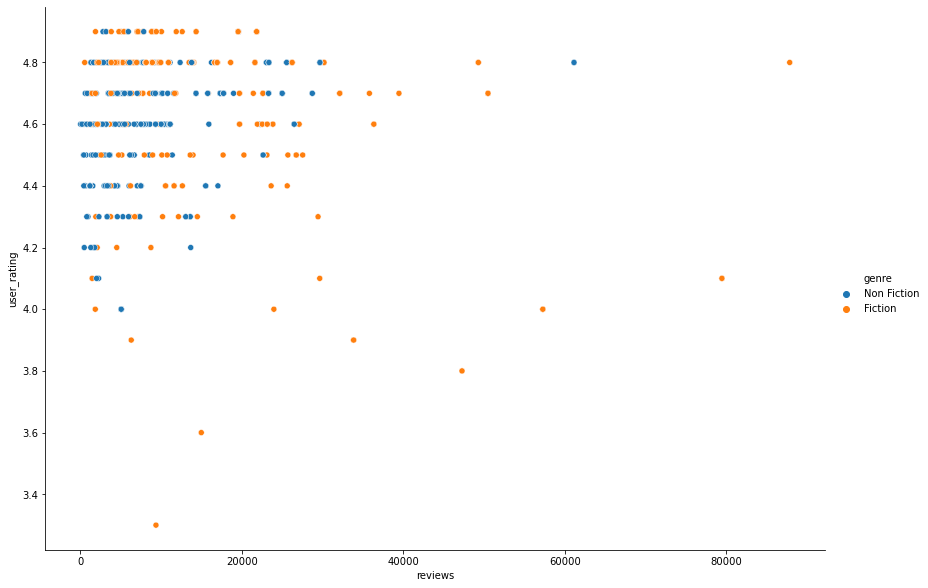

In [34]:
# relationship between a number of reviews and user_rating
sns.relplot(
    data=books_data,
    x='reviews', y='user_rating', hue='genre', height=8.27, aspect=11.7/8.27
)

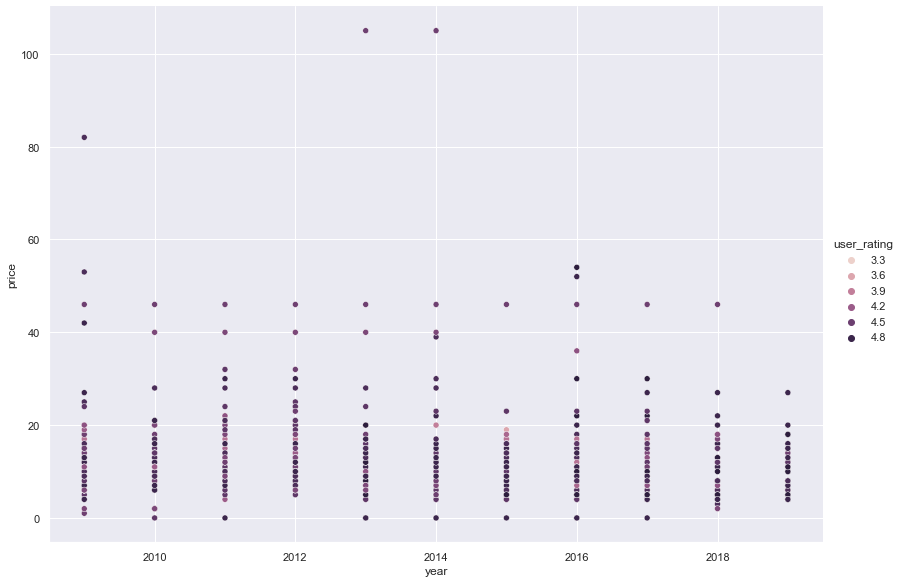

In [38]:
# relationship between year and price
sns.set_theme()
sns.relplot(
    data=books_data,
    x='year', y='price', height=8.27, aspect=11.7/8.27, hue='user_rating'
)

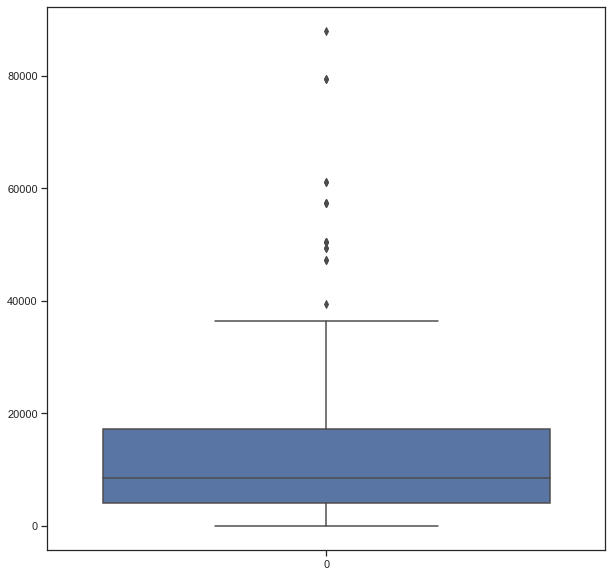

In [52]:
# outliers' in number of reviews
sns.set_style('ticks')
plt.figure(figsize=(10, 10))
sns.boxplot(data=books_data['reviews'])
plt.show()